Summary by Flow Rate:


direction,-,both,down,none,up
flow_rate,,,,,
0.05,3,1,2,0,2
0.10,0,0,4,0,4
0.20,3,0,2,0,3
0.50,2,1,3,0,2
1.00,3,0,2,0,3
5.00,4,0,0,3,1


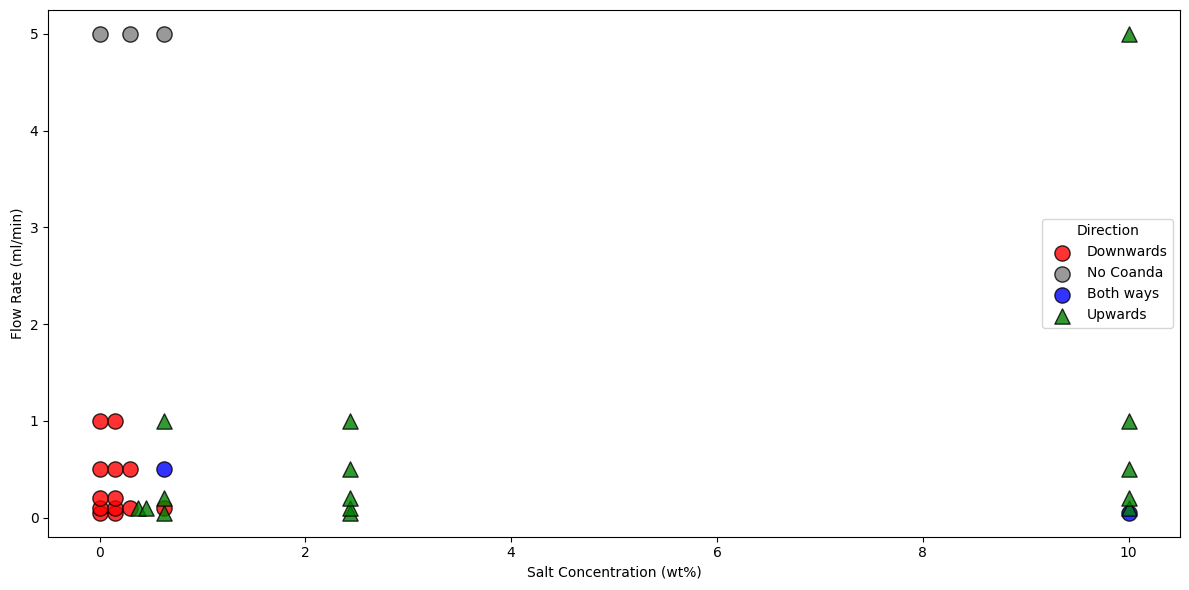

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
# 1. Manually encode your table
# ----------------------------
data = [
    # flow, salt, direction
    (0.05, 0.0, "down"),
    (0.05, 0.15, "down"),
    (0.05, 0.30, "-"),
    (0.05, 0.375, "-"),
    (0.05, 0.45, "-"),
    (0.05, 0.625, "up"),
    (0.05, 2.43, "up"),
    (0.05, 10.0, "both"),

    (0.1, 0.0, "down"),
    (0.1, 0.15, "down"),
    (0.1, 0.30, "down"), # Down mostly, abit up 
    (0.1, 0.375, "up"), # Up mostly, abit down
    (0.1, 0.45, "up"), # Up mostly, abit down
    (0.1, 0.625, "down"),
    (0.1, 2.43, "up"),
    (0.1, 10.0, "up"),

    (0.2, 0.0, "down"),
    (0.2, 0.15, "down"),
    (0.2, 0.30, "-"),
    (0.2, 0.375, "-"),
    (0.2, 0.45, "-"),
    (0.2, 0.625, "up"),
    (0.2, 2.43, "up"),
    (0.2, 10.0, "up"),

    (0.5, 0.0, "down"),
    (0.5, 0.15, "down"),
    (0.5, 0.30, "down"), # Down mostly, abit up 
    (0.5, 0.375, "-"), 
    (0.5, 0.45, "-"),
    (0.5, 0.625, "both"),
    (0.5, 2.43, "up"),
    (0.5, 10.0, "up"),

    (1.0, 0.0, "down"),
    (1.0, 0.15, "down"),
    (1.0, 0.30, "-"),
    (1.0, 0.375, "-"),
    (1.0, 0.45, "-"),
    (1.0, 0.625, "up"), # goes both ways, mostly attached to upper 
    (1.0, 2.43, "up"),
    (1.0, 10.0, "up"),

    (5.0, 0.0, "none"),
    (5.0, 0.15, "-"),
    (5.0, 0.30, "none"),
    (5.0, 0.375, "-"),
    (5.0, 0.45, "-"),
    (5.0, 0.625, "none"), # nocoanda goes up a bit 
    (5.0, 2.43, "-"),
    (5.0, 10.0, "up"),
]

df = pd.DataFrame(data, columns=["flow_rate", "salt_conc", "direction"])

# ----------------------------
# 2. Summary table
# ----------------------------
summary = (
    df.groupby(["flow_rate", "direction"])
      .size()
      .unstack(fill_value=0)
)

print("Summary by Flow Rate:")
display(summary)

# ----------------------------
# 3. Scatter plot (dot at each position, colored by direction, with custom colors and legend)
# ----------------------------
direction_map = {
    "down": -1,
    "none": 0,
    "both": 1,
    "up": 2,
}

df["direction_code"] = df["direction"].map(direction_map)

direction_colors = {
    -1: "red",    # down
    0: "grey",    # none
    1: "blue",    # both
    2: "green",   # up
}
direction_labels = {
    -1: "Downwards",
    0: "No Coanda",
    1: "Both ways",
    2: "Upwards",
}

plt.figure(figsize=(12, 6))
for code, color in direction_colors.items():
    subset = df[df["direction_code"] == code]
    marker_style = "^" if code == 2 else "o"
    plt.scatter(
        subset["salt_conc"],
        subset["flow_rate"],
        color=color,
        s=120,
        edgecolor="k",
        alpha=0.8,
        label=direction_labels[code],
        marker=marker_style
    )
plt.ylabel("Flow Rate (ml/min)")
plt.xlabel("Salt Concentration (wt%)")
plt.legend(title="Direction")
plt.tight_layout()          
plt.show()

# # ----------------------------
# # 4. Direction distribution plot
# # ----------------------------
# plt.figure(figsize=(8, 5))
# sns.countplot(data=df, x="flow_rate", hue="direction")
# plt.title("Direction Distribution per Flow Rate")
# plt.tight_layout()
# plt.show()

